In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
from keras.utils import np_utils
#把正確答案轉成矩陣型式
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [0]:
from keras.models import Model 
from keras.layers import Dense, Activation,Input #Dense是Fully connected的。Activation是設定激活函數用的。
from keras import optimizers 

In [0]:
x=Input(shape=(784,))
f_1=Dense(300,activation='sigmoid')
f_2=Dense(300,activation='sigmoid')
f_3=Dense(300,activation='relu')
f_4=Dense(10,activation='softmax')

h_1=f_1(x)
h_2=f_2(h_1)
h_3=f_3(h_1)

In [0]:
from keras.layers import concatenate,add
u=concatenate([h_2,h_3])
y=f_4(u)
model=Model(x,y)
Adm=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999,epsilon=None, decay=0.0,amsgrad=False)


In [31]:
model.summary()#檢查模型是否正確

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 300)          235500      input_6[0][0]                    
__________________________________________________________________________________________________
dense_22 (Dense)                (None, 300)          90300       dense_21[0][0]                   
__________________________________________________________________________________________________
dense_23 (Dense)                (None, 300)          90300       dense_21[0][0]                   
__________________________________________________________________________________________________
concatenat

In [35]:
model.compile(loss='categorical_crossentropy',optimizer=Adm,metrics=['accuracy'])
train_model=model.fit(x_train, y_train, batch_size=100, epochs=40,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 9s 146us/step - loss: 0.1298 - acc: 0.9595 - val_loss: 0.1206 - val_acc: 0.9628
Epoch 2/40
60000/60000 [==============================] - 8s 139us/step - loss: 0.0986 - acc: 0.9678 - val_loss: 0.1176 - val_acc: 0.9648
Epoch 3/40
60000/60000 [==============================] - 8s 135us/step - loss: 0.0872 - acc: 0.9712 - val_loss: 0.1071 - val_acc: 0.9677
Epoch 4/40
60000/60000 [==============================] - 8s 134us/step - loss: 0.0783 - acc: 0.9737 - val_loss: 0.1068 - val_acc: 0.9663
Epoch 5/40
60000/60000 [==============================] - 8s 130us/step - loss: 0.0751 - acc: 0.9756 - val_loss: 0.1044 - val_acc: 0.9664
Epoch 6/40
60000/60000 [==============================] - 8s 137us/step - loss: 0.0763 - acc: 0.9749 - val_loss: 0.0998 - val_acc: 0.9687
Epoch 7/40
60000/60000 [==============================] - 8s 138us/step - loss: 0.0721 - acc: 0.9763 - val_loss: 0.1074 - 

In [33]:
score = model.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

10000/10000 [==============================] - 1s 70us/step
loss: 0.11386110289394856
正確率 0.9663


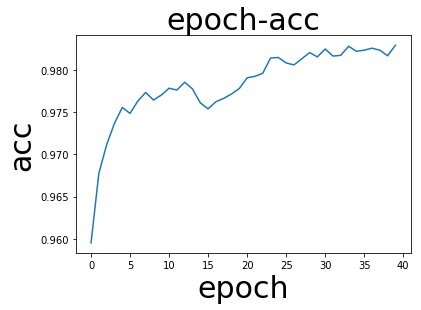

In [36]:
plt.plot(train_model.history["acc"])
plt.xlabel('epoch',size=30)
plt.ylabel('acc',size=30)
plt.title('epoch-acc',size=30)
plt.show()